# Alcohol

Alcohol questions was on drinks of alcoholic beverages that vary from a can or bottles of beer, a glass of win, a shot of liquor, or a mixed drink with liquor in it.

In [22]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [23]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [24]:
case_quest_data = dataset.ix[:,0:2].copy()
alcohol = dataset.ix[:,'ALCEVER':'DR5DAY'].copy() # alcohol dataset

In [25]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

* How many cases use the drug?

Shown below in the histogram is that almost more than quarter of the cases never drank or tried alcohol in their lifetime.

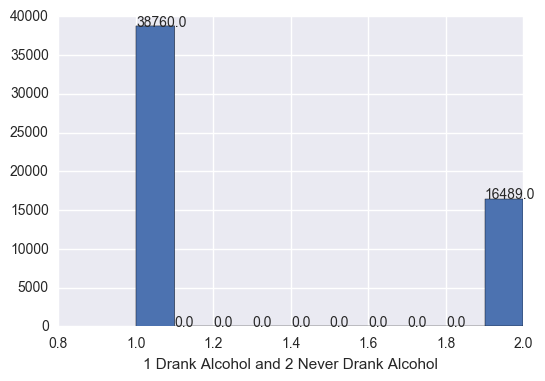

In [26]:
# extract how many ever used the drug
alcohol_ever = alcohol.ix[(alcohol['ALCEVER'] < 3)].copy()
ax = alcohol_ever['ALCEVER'].hist()
plt.xlabel('1 Drank Alcohol and 2 Never Drank Alcohol')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

Age ranges from 11 to 20 are the most common to be drinkin alcohol than any other age ranges. However, as shown below, it is not so popular for older ages, from 40 years, to be drinking alcohol.

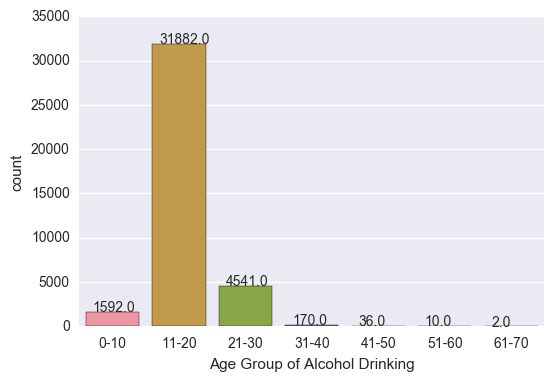

In [27]:
# extract the age range of those who ever used the drug
age_data = alcohol_ever.ix[(alcohol_ever['ALCTRY'] < 90)].copy()
age_data['AgeGroup'] = age_data[['ALCTRY']].apply(cutDF)
ax = sns.countplot(x=age_data['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of Alcohol Drinking')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

Less than half of the cases did not drink alcohol in the pervious 30 days from the conduction of the survey. Unfortunetly, it is not clear what exactly the estimate is as not so many cases replied to this question. However, the estimate number of days for those who still drank and answered tends to be 1 to 5 days in the previous 30 days. 

1 = 1 to 2 Days <br/>
2 = 3 to 5 Days <br/>
3 = 6 to 9 Days <br/>
4 = 10 to 19 Days <br/>
4 = 20 to 29 Days <br/>
6 = All 30 Days <br/>
7 = Did Not Drink Alcohol in the Past 30 Days <br/>

Also below, the study showed how many drinks do they usually drink per day using numbers ranging from 1-91 and 91 being that they did not drink alcohol in the past 30 days. Ages from 20 and older tend to drink less alcohol than younger years. It can also be inferred that not many cases drink more than 60 drinks per day

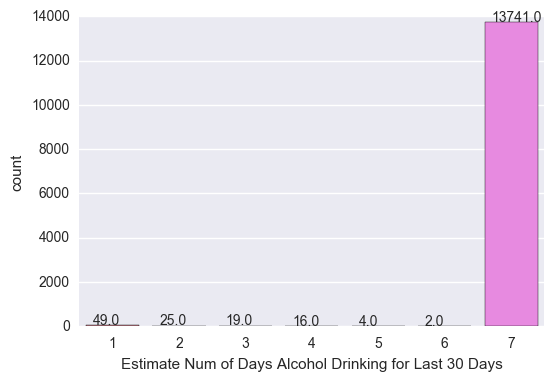

In [28]:
# estimate of number of days used the drug for the last 30 days
estHowMany = age_data.ix[(age_data['AL30EST'] < 7) | (age_data['AL30EST'] == 93)].copy()
estHowMany['AL30EST'] = estHowMany.ix[:,'AL30EST'].replace(to_replace=93, value=7)
ax = sns.countplot(estHowMany['AL30EST'])
plt.xlabel('Estimate Num of Days Alcohol Drinking for Last 30 Days')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

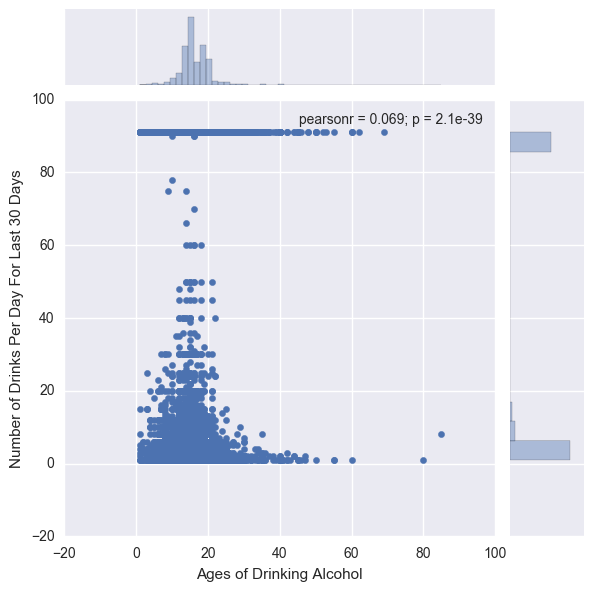

In [29]:
# num of drinks per day for last 30 days
drinksPerDay = age_data.ix[(age_data['NODR30A'] < 91) | (age_data['NODR30A'] == 993)].copy()
drinksPerDay['NODR30A'] = drinksPerDay.ix[:,'NODR30A'].replace(to_replace=993, value=91)
sns.jointplot(x=drinksPerDay['ALCTRY'],y=drinksPerDay['NODR30A']).set_axis_labels("Ages of Drinking Alcohol", "Number of Drinks Per Day For Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

As can also be interpretted from the above information, more than half of the cases drank alcohol within the past 30 days.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago <br/>

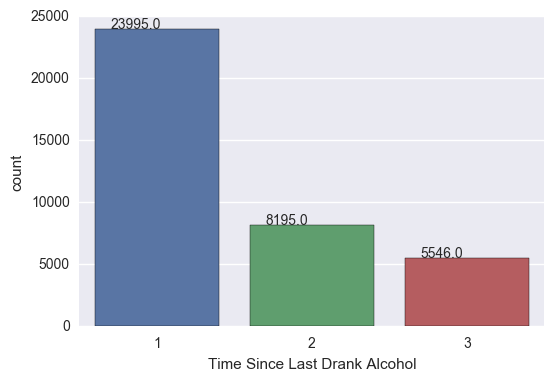

In [30]:
lastUsed = age_data.ix[(age_data['ALCREC'] < 5)].copy()
ax = sns.countplot(lastUsed['ALCREC'])
plt.xlabel('Time Since Last Drank Alcohol')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Cocaine and Crack](Cocaine and Crack.ipynb)